---

# Práctica Spark ML 

Pedro Ruiz - xx xx xxxx

---


## 1. Primera Parte (6 puntos)

Utilizando la API de pandas de PySpark:

```python
import pyspark.pandas as ps
```

Realiza un EDA (Análisis Exploratorio de Datos) del dataset anterior.

### Descripción del problema

Esta primera parte del proyecto se centra en el análisis de un conjunto de datos relacionados con pólizas de seguros, ya sean de salud o de vida. 

<u>**Preparación del entorno**</u>.

La fase inicial del proyecto consiste en la preparación del entorno de trabajo, que abarca la instalación e importación de los componentes necesarios para garantizar un análisis preciso de los datos.

In [1]:
# Imports

import pandas as pd
import numpy as np

## Imports PySparkPandas and Koalas
import pyspark.pandas as ps

# Configuration of PySpark so that it can perform operations on different DataFrames
ps.options.compute.ops_on_diff_frames = True

## Importing PySpark features
from pyspark.sql.functions import col
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

from sklearn.preprocessing import StandardScaler

## Import of Graphic Libraries
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\pedro\miniconda\envs\atrium\lib\site-packages\pyspark\pandas\__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


In [2]:
# Spark session configuration

## We import the module needed to login to Spark
from pyspark.sql import SparkSession

## Create a session
spark = SparkSession.builder.appName("Spark ML").getOrCreate()

### Tipos de datos disponibles y análisis exploratorio.

<u>**Conjunto de datos**</u>

En esta sección, importaremos el conjunto de datos y realizaremos una vista previa. Exploraremos la naturaleza y estructura de los datos, identificando los diferentes tipos de información que contiene. Este paso inicial es crucial para entender y comenzar a probar nuestro conjunto de datos.


In [3]:
# We import the working dataset
data = ps.read_csv('data/insurance.csv')
data.head()

c:\Users\pedro\miniconda\envs\atrium\lib\site-packages\pyspark\pandas\utils.py:1016: PandasAPIOnSparkAdviceWarning: If `index_col` is not specified for `read_csv`, the default index is attached which can cause additional overhead.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
data = ps.read_csv('data/insurance.csv')

# Mostrar las primeras filas del DataFrame para verificar la carga
print(data.head())

# Contar valores nulos para cada columna
null_counts = data.isnull().sum()

# Mostrar el resultado
print(null_counts)

c:\Users\pedro\miniconda\envs\atrium\lib\site-packages\pyspark\pandas\utils.py:1016: PandasAPIOnSparkAdviceWarning: If `index_col` is not specified for `read_csv`, the default index is attached which can cause additional overhead.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


Py4JJavaError: An error occurred while calling o1092.collectToPython.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 17.0 failed 1 times, most recent failure: Lost task 0.0 in stage 17.0 (TID 14) (host.docker.internal executor driver): org.apache.spark.SparkException: Python worker failed to connect back.
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:203)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:109)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:124)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:174)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:67)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: java.net.SocketTimeoutException: Accept timed out
	at java.base/java.net.PlainSocketImpl.waitForNewConnection(Native Method)
	at java.base/java.net.PlainSocketImpl.socketAccept(PlainSocketImpl.java:163)
	at java.base/java.net.AbstractPlainSocketImpl.accept(AbstractPlainSocketImpl.java:474)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:565)
	at java.base/java.net.ServerSocket.accept(ServerSocket.java:533)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:190)
	... 32 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2856)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2792)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2791)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2791)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1247)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3060)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2994)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2983)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:989)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2398)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2419)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2438)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:530)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:483)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:61)
	at org.apache.spark.sql.Dataset.$anonfun$collectToPython$1(Dataset.scala:4148)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$2(Dataset.scala:4322)
	at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:546)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:4320)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:125)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:201)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:108)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:900)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:66)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:4320)
	at org.apache.spark.sql.Dataset.collectToPython(Dataset.scala:4145)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: org.apache.spark.SparkException: Python worker failed to connect back.
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:203)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:109)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:124)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:174)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:67)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	... 1 more
Caused by: java.net.SocketTimeoutException: Accept timed out
	at java.base/java.net.PlainSocketImpl.waitForNewConnection(Native Method)
	at java.base/java.net.PlainSocketImpl.socketAccept(PlainSocketImpl.java:163)
	at java.base/java.net.AbstractPlainSocketImpl.accept(AbstractPlainSocketImpl.java:474)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:565)
	at java.base/java.net.ServerSocket.accept(ServerSocket.java:533)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:190)
	... 32 more


Como mencioné anteriormente, nos enfrentamos a un conjunto de datos que probablemente corresponda a seguros de salud o de vida. En este conjunto, encontramos métricas que parecen destinadas a determinar la tasa de prima que debe pagar cada asegurado.

> Leyenda de los Datos:
- `age`: Representa la edad del individuo, expresada como un número entero.
- `sex`: Indica el género del individuo, siendo una cadena categórica que puede tomar los valores femenino o masculino.
- `bmi`: El Índice de Masa Corporal (IMC) del individuo, representado como un número decimal.
- `children`: Muestra el número de hijos dependientes del individuo, expresado como un número entero.
- `smoker`: Indica si el individuo es fumador o no, siendo una variable categórica con valores "yes" o "no".
- `region`: Representa la región geográfica en la que reside el asegurado, siendo una variable categórica con valores noreste, noroeste, suroeste o sureste.
- `charges`: Indica el precio final para el individuo asegurado, expresado como números decimales.

### Preparar y limpiar los datos

Antes de realizar un análisis más significativo, es esencial que dediquemos tiempo a preparar y limpiar los datos. Aquí abordaremos la gestión de valores nulos, la estandarización de formatos y cualquier otra tarea necesaria para garantizar que los datos estén en un estado óptimo para el análisis. La calidad de los resultados dependerá en gran medida de la calidad de esta fase.



In [5]:
# Verificar valores nulos en el dataset
nulls = data.isnull().sum()

print(nulls)

Py4JJavaError: An error occurred while calling o693.collectToPython.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 10.0 failed 1 times, most recent failure: Lost task 0.0 in stage 10.0 (TID 8) (host.docker.internal executor driver): org.apache.spark.SparkException: Python worker failed to connect back.
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:203)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:109)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:124)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:174)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:67)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: java.net.SocketTimeoutException: Accept timed out
	at java.base/java.net.PlainSocketImpl.waitForNewConnection(Native Method)
	at java.base/java.net.PlainSocketImpl.socketAccept(PlainSocketImpl.java:163)
	at java.base/java.net.AbstractPlainSocketImpl.accept(AbstractPlainSocketImpl.java:474)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:565)
	at java.base/java.net.ServerSocket.accept(ServerSocket.java:533)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:190)
	... 32 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2856)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2792)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2791)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2791)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1247)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3060)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2994)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2983)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:989)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2398)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2419)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2438)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:530)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:483)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:61)
	at org.apache.spark.sql.Dataset.$anonfun$collectToPython$1(Dataset.scala:4148)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$2(Dataset.scala:4322)
	at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:546)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:4320)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:125)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:201)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:108)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:900)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:66)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:4320)
	at org.apache.spark.sql.Dataset.collectToPython(Dataset.scala:4145)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: org.apache.spark.SparkException: Python worker failed to connect back.
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:203)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:109)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:124)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:174)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:67)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	... 1 more
Caused by: java.net.SocketTimeoutException: Accept timed out
	at java.base/java.net.PlainSocketImpl.waitForNewConnection(Native Method)
	at java.base/java.net.PlainSocketImpl.socketAccept(PlainSocketImpl.java:163)
	at java.base/java.net.AbstractPlainSocketImpl.accept(AbstractPlainSocketImpl.java:474)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:565)
	at java.base/java.net.ServerSocket.accept(ServerSocket.java:533)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:190)
	... 32 more


Al revisar la información proporcionada, parece que en esta ocasión, el proceso de limpieza y normalización de datos no debería presentar muchos desafíos.

Observamos que el conjunto de datos consta de 1338 filas y no se detectan valores faltantes o nulos en ninguna de las variables. Esto simplificará considerablemente la etapa de preparación de datos, permitiéndonos centrarnos directamente en el análisis.


In [5]:
# We search for duplicate data
duplicated_df = data[data.duplicated()]
duplicated_df

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


De acuerdo, hemos identificado la presencia de un elemento duplicado; en este caso, el ID 581 ha sido registrado previamente.

Dada la información limitada disponible en nuestro conjunto de datos, nos enfrentamos a la situación de tener dos IDs diferentes con parámetros idénticos. En estas circunstancias y sin más detalles, asumo que se refiere a dos personas diferentes con configuraciones idénticas. Por lo tanto, creo que lo más conveniente es no eliminar este elemento duplicado para mantener toda la información disponible. Me gustaría señalar que esta elección se hace con la precaución de no perder datos valiosos, aunque puede requerir revisión en el futuro si se obtiene información adicional.

#### - Normalización de datos categóricos

Antes de continuar, y dado que estamos a punto de realizar cambios significativos en el conjunto de datos, es momento de hacer una copia de seguridad del conjunto de datos.

También haremos la transición a PySpark para facilitar la modificación de sus columnas.


In [6]:
# Create a copy of the Dataset to make changes
df = data.copy()

# We transform SPark
df_spark = df.to_spark()

c:\Users\pedro\miniconda\envs\spark\lib\site-packages\pyspark\pandas\utils.py:1016: PandasAPIOnSparkAdviceWarning: If `index_col` is not specified for `to_spark`, the existing index is lost when converting to Spark DataFrame.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


In [ ]:
# We create a StringIndexer for each column of categorical data
indexer_sex = StringIndexer(inputCol="sex", outputCol="sex_index")
indexer_smoker = StringIndexer(inputCol="smoker", outputCol="smoker_index")
indexer_region = StringIndexer(inputCol="region", outputCol="region_index")

# We execute each StringIndexer on the DataSet
df_spark = indexer_sex.fit(df_spark).transform(df_spark)
df_spark = indexer_smoker.fit(df_spark).transform(df_spark)
df_spark = indexer_region.fit(df_spark).transform(df_spark)

# We caste the data of the columns in integers.
df_spark = df_spark.withColumn("sex_index", col("sex_index").cast("integer"))
df_spark = df_spark.withColumn("smoker_index", col("smoker_index").cast("integer"))
df_spark = df_spark.withColumn("region_index", col("region_index").cast("integer"))

# We eliminate the original columns
df_spark = df_spark.drop("sex", "smoker", "region")

# And we replace them with the normalized ones
df_spark = df_spark.withColumnRenamed("sex_index", "sex")
df_spark = df_spark.withColumnRenamed("smoker_index", "smoker")
df_spark = df_spark.withColumnRenamed("region_index", "region")

# Transform Dataset to Koalas
df = ps.DataFrame(df_spark)
df.head()

Genial, todo está progresando de manera muy prometedora.

> Ahora, echemos un vistazo a cómo han resultado las modificaciones que hemos implementado:
- `sex`: 0 para Hombre / 1 para Mujer.
- `smoker`: 0 para No / 1 para Sí
- `region`: 0 para Suroeste / 1 para Noroeste / 2 para Sureste / 3 para Noreste

Estas codificaciones se proporcionan para facilitar el procesamiento posterior del modelo.

### Análisis exploratorio

En este punto, profundizaremos en un análisis exploratorio para descubrir patrones, tendencias y distribuciones dentro de las variables independientes. Utilizaremos herramientas visuales y estadísticas descriptivas para obtener una comprensión profunda de la información contenida en cada variable.

Comenzaremos solicitando una lista descriptiva de los datos.


In [7]:
# We request descriptive information
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4738.268200
50%,39.000000,30.400000,1.000000,9377.904700
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


En mi experiencia, encuentro útil comenzar los análisis exploratorios con una tabla descriptiva, ya que facilita el trabajo de visualización posterior.

> En este caso, al revisar la tabla, podemos destacar las siguientes observaciones:
1. La edad promedio de los individuos es de 39 años, con una edad mínima de 18 y una edad máxima de 64.
2. El índice de masa corporal tiene un promedio de 30.6. Después de consultar los datos de la OMS, podemos determinar que los individuos en este conjunto sufren de obesidad.
3. La mayoría de las personas tienen solo un hijo, aunque es común tener entre 0 y 2 hijos.
4. El promedio de los cargos es de 13270. Sin embargo, se observa una desviación significativa de 12110, lo que indica una gran variabilidad entre los cargos de la población en el conjunto de datos.
5. Los datos de género parecen estar bien equilibrados en número en la muestra.

¡Excelente! Ahora llegamos a una de mis secciones favoritas.

Vamos a proceder a generar visualizaciones para cada característica, con el objetivo de verificar su distribución y, con suerte, extraer información adicional.

Como dicen, ¡todo se ve mejor con gráficos!

Antes de avanzar, y considerando que estamos trabajando con un conjunto de datos pequeño, transformaremos los datos a Pandas. Esto facilitará la manipulación de los datos de una manera más amigable.


In [8]:
# We create a transformation to pandas
df_pandas = df.to_pandas()

c:\Users\pedro\miniconda\envs\spark\lib\site-packages\pyspark\pandas\utils.py:1016: PandasAPIOnSparkAdviceWarning: `to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


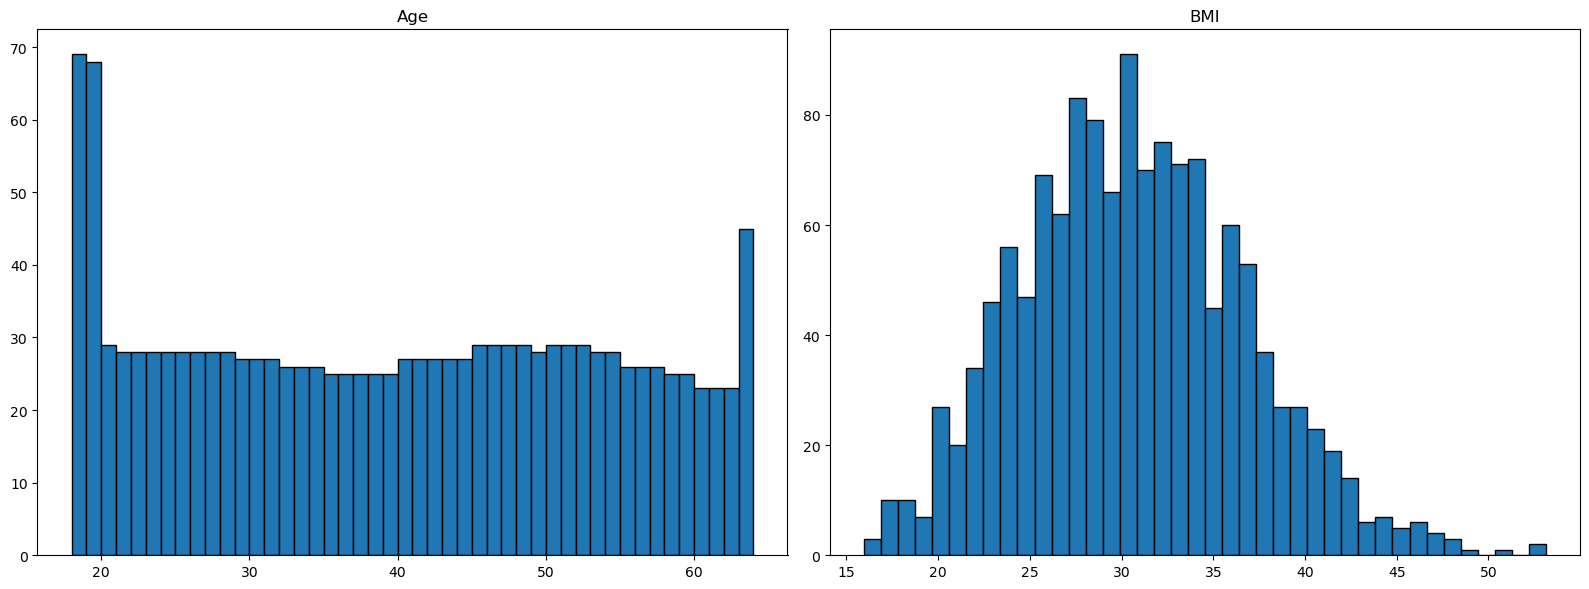

In [9]:
# We create a grid for two graphs
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

## Age Chart
axs[0].hist(df_pandas['age'], bins=46, edgecolor='black')
axs[0].set_title('Age')

## BMI
axs[1].hist(df_pandas['bmi'], bins=40, edgecolor='black')
axs[1].set_title('BMI')


plt.tight_layout()
plt.show()

De acuerdo, en estos gráficos vemos los valores de las columnas de Edad e Índice de Masa Corporal (IMC).

- `age`
  
  El gráfico muestra una distribución bastante estable, pero destacan dos grupos en particular: menores de 20 años, que representan un número significativo en la muestra, y luego individuos alrededor de los 65 años de edad.

- `bmi`

  Según los datos proporcionados por la muestra, la mayoría de los individuos tienen un IMC en el rango de 25-35, lo que sugiere que la gran mayoría de la población en este conjunto de datos tiene sobrepeso u obesidad.


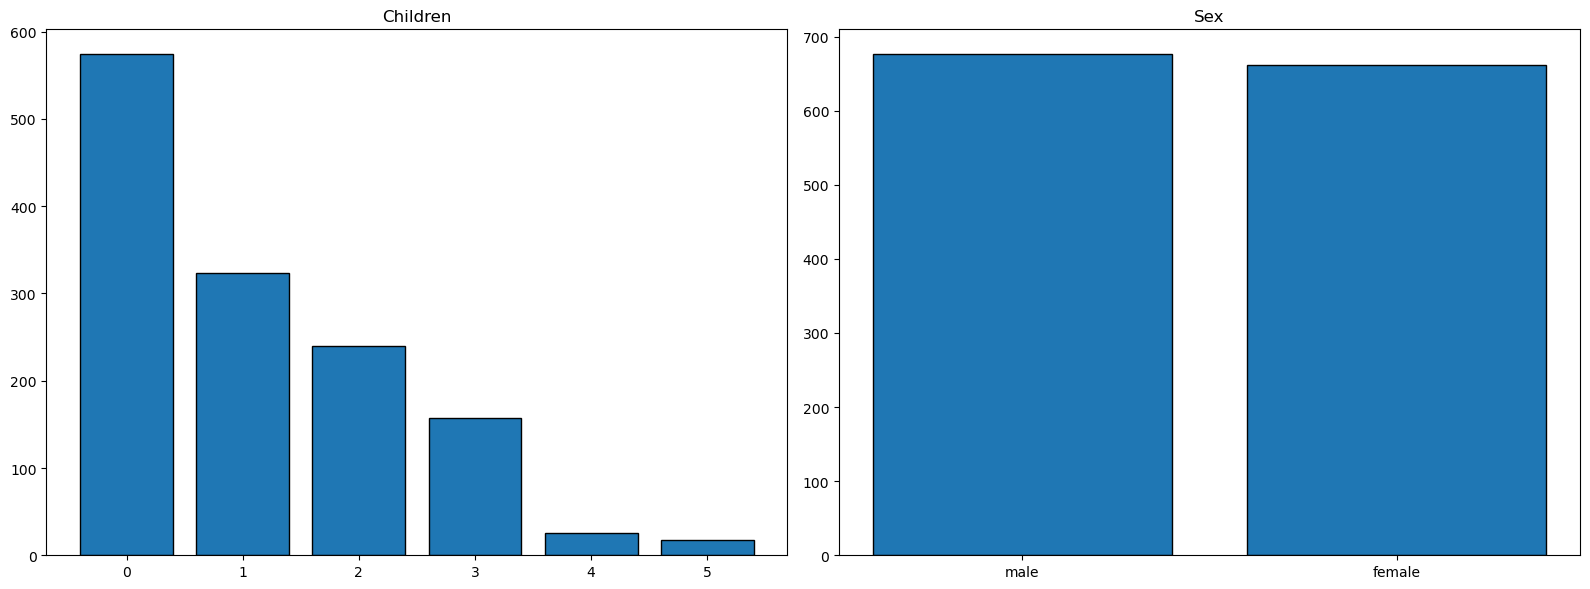

In [10]:
# We create a grid for two graphs
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

## Create the indexes for the graphs
children_counts = df_pandas['children'].value_counts()                                 # We count the number of values of 'children' and 'sex' and pass to pandas
sex_counts = df_pandas['sex'].value_counts()

## Chart for children
axs[0].bar(children_counts.index, children_counts.values, edgecolor='black')
axs[0].set_title('Children')

## Chart for sex
axs[1].bar(sex_counts.index, sex_counts.values, edgecolor='black')
axs[1].set_title('Sex')
axs[1].set_xticks(sex_counts.index)                                                    # We change the x-axis markers to the indexing values of sex_counts

plt.tight_layout()
plt.show()

En este segundo par de gráficos, observamos la distribución de las variables Niños y Sexo:

- `children`

  Según los datos, es evidente una clara tendencia hacia individuos sin hijos o con familias pequeñas. Esta observación, junto con los datos de edad anteriores, sugiere que la muestra está compuesta por un gran número de individuos jóvenes y/o solteros.

- `sex`

  Podemos determinar que hay paridad entre hombres y mujeres, ya que la distribución muestra una proporción igual entre ambos géneros.


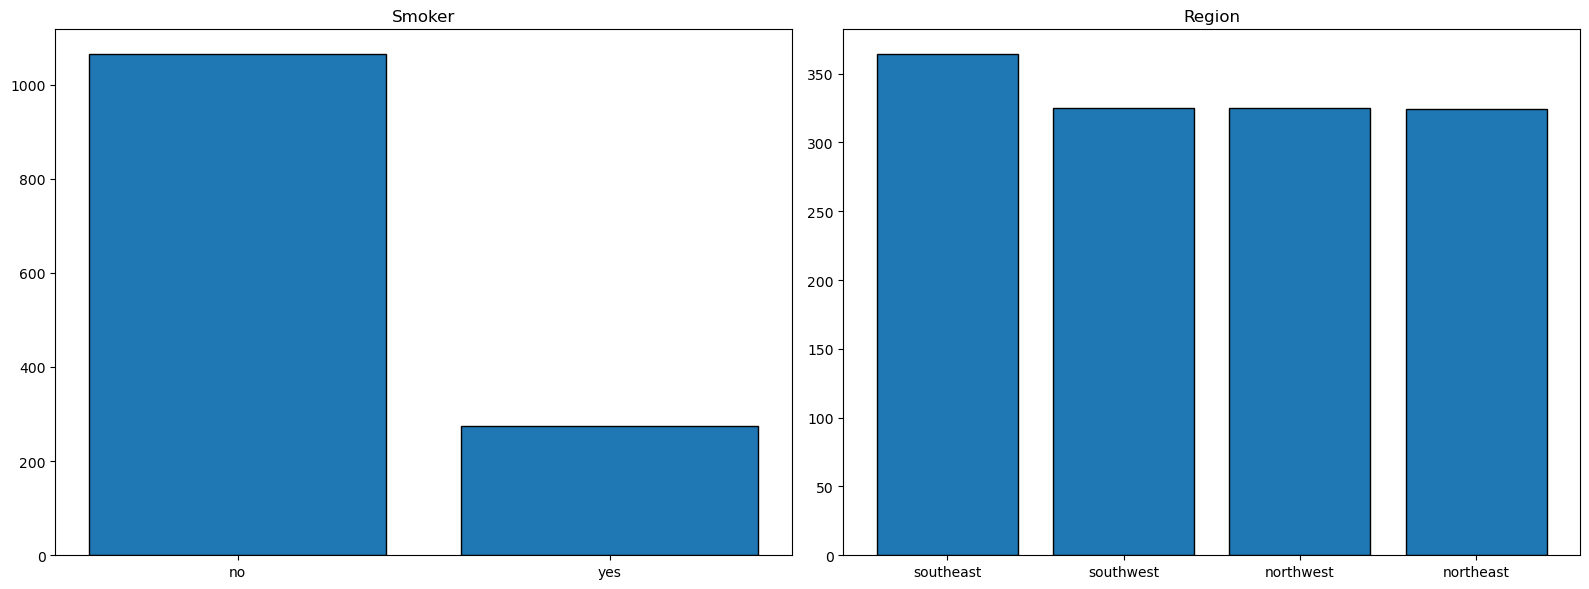

In [11]:
# We create a grid for two graphs
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

## Create the indexes for the graphs
smoker_counts = df_pandas['smoker'].value_counts()
region_counts = df_pandas['region'].value_counts()

## Chart for smoker
axs[0].bar(smoker_counts.index, smoker_counts.values, edgecolor='black')
axs[0].set_title('Smoker')
axs[0].set_xticks(smoker_counts.index)

## Chart for region
axs[1].bar(region_counts.index, region_counts.values, edgecolor='black')
axs[1].set_title('Region')
axs[1].set_xticks(region_counts.index)

plt.tight_layout()
plt.show()

De acuerdo, en estos gráficos examinamos los valores de las columnas de Fumador e Índice de Masa Corporal (IMC).

- `smoker`

  Los datos para la variable fumador indican que hay una clara mayoría de no fumadores en la muestra.

- `region`

  Después de la transformación de los datos de la variable región, se categorizaron como:
  0. Suroeste
  1. Noroeste
  2. Suroeste
  3. Noroeste
  
  El gráfico muestra un equilibrio entre las regiones, con una ligera preponderancia de individuos del Suroeste.

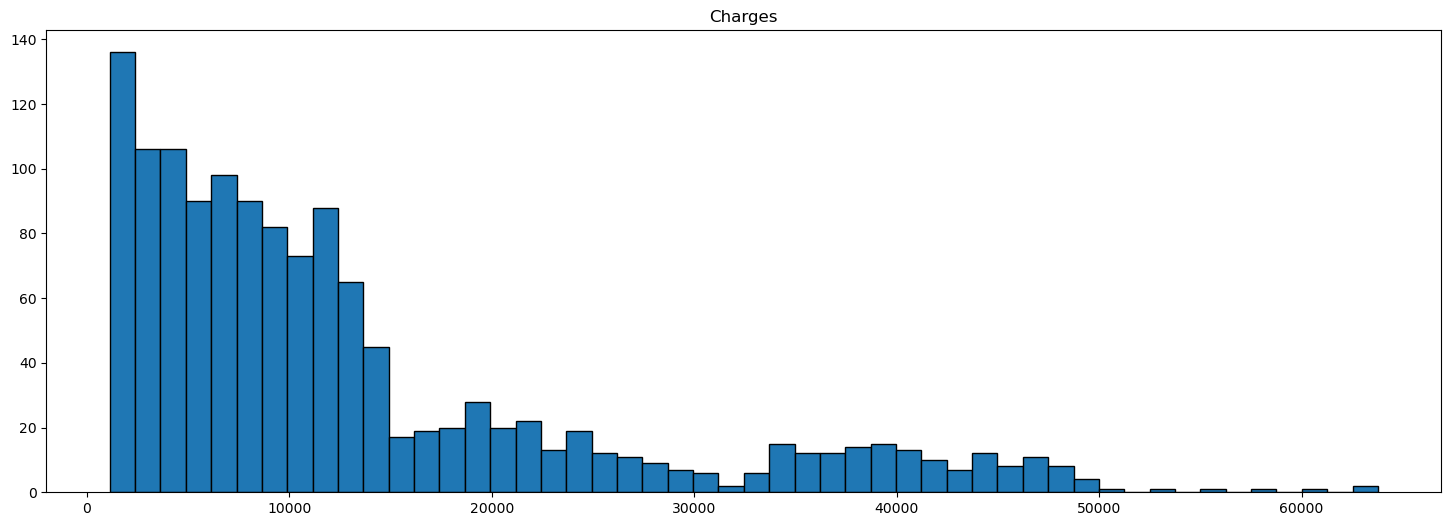

In [12]:
# We create the chart for the graph charges
plt.figure(figsize=(18, 6))

plt.hist(df_pandas['charges'], bins=50, edgecolor='black')
plt.title('Charges')

plt.show()

En este gráfico, examinamos la distribución de las cuotas de los individuos.

Observamos una clara mayoría de cuotas en un rango de precios bajo, de 0 a 14000. A partir de este punto, observamos una disminución drástica que persiste hasta por encima de 60000. Este patrón sugiere una concentración significativa de cuotas en el rango inferior, con una disminución considerable a medida que el precio aumenta.

### Análisis multivariado

El análisis multivariado nos permite explorar las interacciones complejas entre varias variables. Aunque no profundizaremos mucho aquí, ya que no es el propósito de este trabajo, al examinar estas relaciones simultáneamente, obtenemos una imagen más compleja que nos permitirá desentrañar conexiones y comprender la complejidad subyacente del conjunto de datos.

En esta ocasión, nuestro objetivo es descubrir relaciones valiosas que nos ayuden a identificar las combinaciones más significativas para predecir nuestra variable objetivo `charges`.

Comenzaremos el proceso creando una matriz de correlación, que visualizaremos para percibir más clara y eficazmente las relaciones.


In [13]:
# We create a correlation matrix and transform it to pandas.
corr = df_pandas.corr()

plt.figure(figsize=(19, 8))

sns.heatmap(corr, annot=True, cmap='rocket')

plt.show()

ValueError: could not convert string to float: 'female'

Esto está empezando a ponerse interesante; veamos qué nos dicen los datos sobre las relaciones con `charges`:

1. La variable `smoker` muestra una correlación positiva muy fuerte con la variable objetivo, lo que sugiere que los fumadores tienden a tener cuotas más altas.

2. La variable `age` muestra una correlación positiva con `charges`, lo que indica que la edad tiene alguna relación con el precio que cada individuo paga.

3. La variable `bmi` exhibe una correlación positiva débil con la variable `charges`, lo que sugiere que es un factor influyente pero no determinante en la cuota de cada individuo. Además, observamos que los individuos con más hijos tienden a tener un mayor índice de masa corporal.


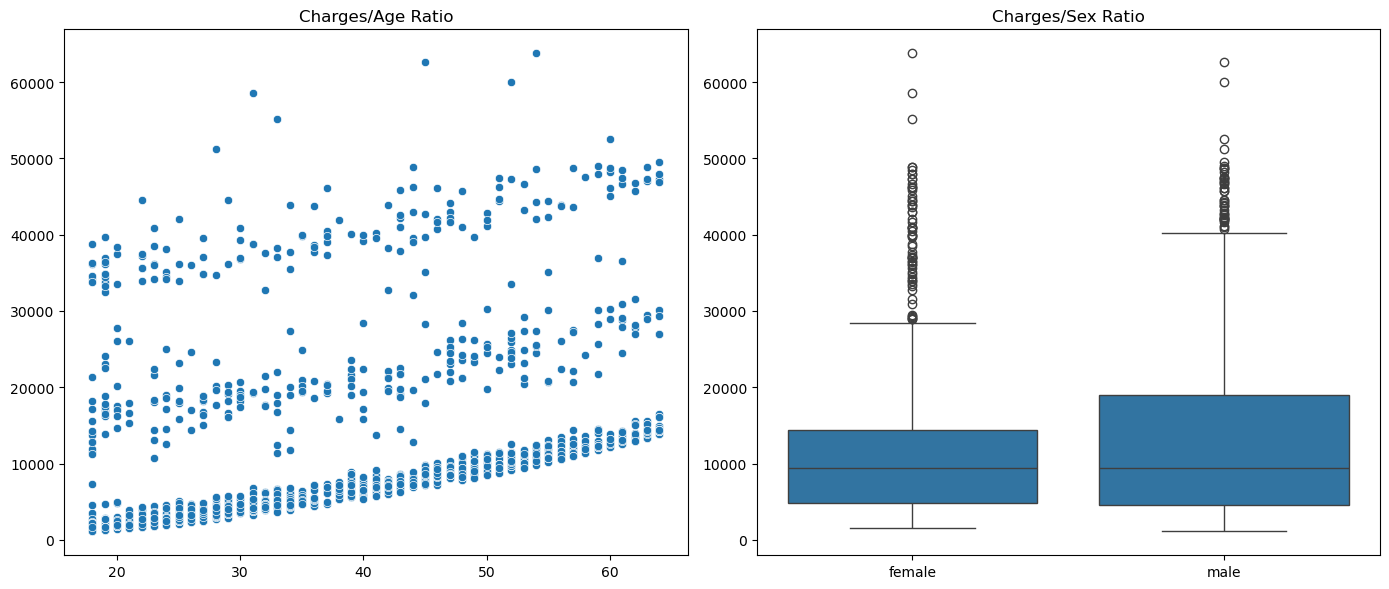

In [14]:
# We create a grid for two graphs
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot for charges/age
sns.scatterplot(x='age', y='charges', data=df_pandas, ax=axs[0])
axs[0].set_title('Charges/Age Ratio')
axs[0].set_xlabel('')                                                           # We empty the axis labels
axs[0].set_ylabel('')

# Box plot for charges/sex
sns.boxplot(x='sex', y='charges', data=df_pandas, ax=axs[1])
axs[1].set_title('Charges/Sex Ratio')
axs[1].set_xlabel('')                                                           # We empty the axis labels
axs[1].set_ylabel('')

plt.tight_layout()
plt.show()

- <u>Relación entre `charges`/`age`</u>
  
  En este diagrama de dispersión, exploramos la relación entre la cuota y la edad de cada individuo. A pesar de los datos dispersos, hay una clara inclinación hacia cuotas más altas a medida que aumenta la edad de los individuos.

- <u>Relación entre `charges`/`sex`</u>

  En este diagrama de caja, examinamos la relación entre las cuotas de los individuos y su género. Se destaca que la mediana y el cuartil inferior son similares en ambos géneros. En cuanto al cuartil superior, se observa una mayor dispersión entre los hombres, aunque existen valores atípicos en ambos géneros.


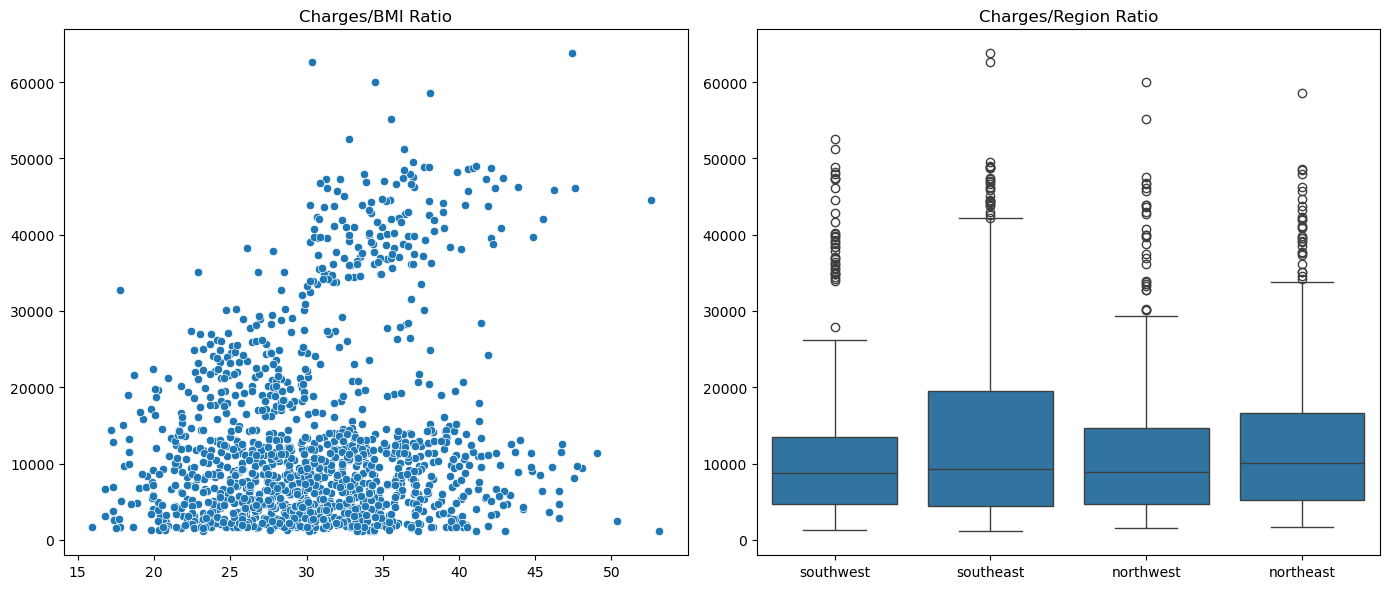

In [15]:
# We create a grid for two graphs
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Scatter chart for charges/bmi
sns.scatterplot(x='bmi', y='charges', data=df_pandas, ax=axs[0])
axs[0].set_title('Charges/BMI Ratio')
axs[0].set_xlabel('')
axs[0].set_ylabel('')

# Box chart for charges/region
sns.boxplot(x='region', y='charges', data=df_pandas, ax=axs[1])
axs[1].set_title('Charges/Region Ratio')
axs[1].set_xlabel('')
axs[1].set_ylabel('')

plt.tight_layout()
plt.show()

- <u>Relación entre `BMI`/`charges`</u>

  El diagrama de dispersión, a pesar de mostrar mucha variabilidad, sugiere, como indicó la matriz de correlación, que existe alguna tendencia a que la tasa de IMC tenga un efecto en la variable `charges`.

- <u>Relación entre `region`/`charges`</u>

  En este gráfico, observamos que la media y los cuartiles inferiores de todas las regiones son muy similares. Sin embargo, también son visibles la dispersión y los valores atípicos en las diferentes regiones, aunque la distribución parece ser bastante similar en todas las regiones.


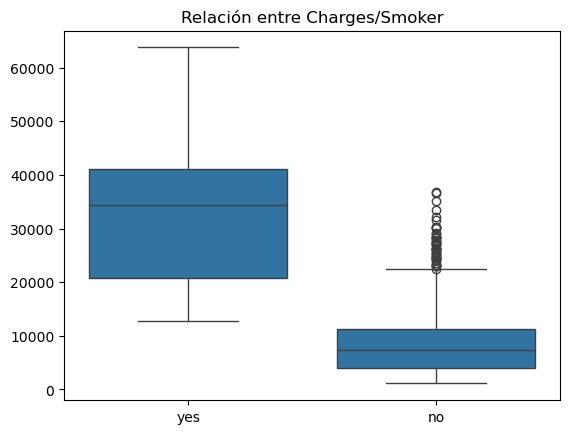

In [16]:
# We create a box plot for the charges/smoker relationship.
sns.boxplot(x='smoker', y='charges', data=df_pandas)

plt.title('Relación entre Charges/Smoker')
plt.xlabel('')
plt.ylabel('')

plt.show()

Bueno, como observamos anteriormente en la matriz de correlación, hemos identificado a `smoker` como la variable más determinante en la influencia de la variable objetivo.

- Observamos que el precio de la cuota de los individuos fumadores es considerablemente más alto que el de los no fumadores. El promedio ronda los 35,000, mientras que el de los no fumadores es de aproximadamente 7500.

- Detectamos valores atípicos en el segmento de no fumadores, así como una gran dispersión en el segmento más alto de fumadores. Esto nos dice que, aunque la variable fumador es una característica influyente en nuestra variable objetivo, existen otras características como la edad, el índice de masa corporal y el número de hijos que también influyen en la cuota final.


Como conclusión del Análisis Exploratorio de Datos (EDA), aunque podríamos profundizar más en la interrelación de otras variables, podemos teorizar que la cuota de `charges` está principalmente determinada por tres variables importantes: `smoker`, `age` y `bmi`.

### Modelo de regresión con Spark ML

A continuación, aplicaremos técnicas de aprendizaje automático y crearemos un modelo de regresión utilizando Spark para predecir con la mayor precisión posible los valores de la variable "charges" en la muestra.

Como punto de partida, convertiremos el DataFrame a un formato compatible con Spark. Posteriormente, verificaremos su disposición y orden para asegurarnos de que su integridad no se haya alterado durante el proceso.

In [17]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [18]:
# Transform the dataset to pyspark
df_spark = df.to_spark()

# We print the schema and visualize part of them
df_spark.printSchema()
df_spark.show()

root
 |-- age: integer (nullable = true)
 |-- sex: string (nullable = true)
 |-- bmi: double (nullable = true)
 |-- children: integer (nullable = true)
 |-- smoker: string (nullable = true)
 |-- region: string (nullable = true)
 |-- charges: double (nullable = true)

+---+------+------+--------+------+---------+-----------+
|age|   sex|   bmi|children|smoker|   region|    charges|
+---+------+------+--------+------+---------+-----------+
| 19|female|  27.9|       0|   yes|southwest|  16884.924|
| 18|  male| 33.77|       1|    no|southeast|  1725.5523|
| 28|  male|  33.0|       3|    no|southeast|   4449.462|
| 33|  male|22.705|       0|    no|northwest|21984.47061|
| 32|  male| 28.88|       0|    no|northwest|  3866.8552|
| 31|female| 25.74|       0|    no|southeast|  3756.6216|
| 46|female| 33.44|       1|    no|southeast|  8240.5896|
| 37|female| 27.74|       3|    no|northwest|  7281.5056|
| 37|  male| 29.83|       2|    no|northeast|  6406.4107|
| 60|female| 25.84|       0|    no|n

c:\Users\pedro\miniconda\envs\spark\lib\site-packages\pyspark\pandas\utils.py:1016: PandasAPIOnSparkAdviceWarning: If `index_col` is not specified for `to_spark`, the existing index is lost when converting to Spark DataFrame.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


A continuación, definimos las variables de entrada que hemos identificado como más relevantes para el modelo, así como la variable a predecir.

Luego realizaremos las transformaciones necesarias para ajustar los datos y prepararlos para su uso en nuestro modelo de regresión.

In [ ]:
# We create the input and output variables
input_cols = ['bmi', 'age','smoker']
output_col = 'features'

# Create a Vector Assembler
assembler = VectorAssembler(inputCols=input_cols, outputCol=output_col)         # We group the input columns into a single vector column next to features.

# We transform the DataSet
df_transformed = assembler.transform(df_spark)                                  # We apply the assembly transformation in a new Dataset

# Rename the 'charges' column
df_transformed = df_transformed.withColumnRenamed('charges', 'label')           # We only do this to standardize and comply with the requirements and to have a good localization of our target range.

# We create a new Dataset with the variables and values already transformed.
df_final = df_transformed.select('features', 'label')

# We perform a final check of the transformed Dataset.
df_final.printSchema()

¡Genial! Con los datos ya procesados, podemos proceder a dividir el conjunto de datos para el entrenamiento.

In [ ]:
train_data, test_data = df_final.randomSplit([0.7, 0.3])                        # After several iterations, it appears that 70-30% is the percentage with the highest success rate.

print("Training set size:", train_data.count())
print("Test set size:", test_data.count())

Generamos el modelo de regresión a través del cual pasaremos el conjunto de datos.

In [ ]:
# We create the regression model and indicate which are the characteristics and which is the variable to predict.
lr = LinearRegression(featuresCol='features', labelCol='label')

# We train the model with the data
lr_model = lr.fit(train_data)

# Perform the prediction
predictions = lr_model.transform(test_data)

Y finalmente, realizaremos una breve evaluación de los resultados obtenidos por nuestro modelo. Utilizaremos funciones de error para analizar su rendimiento y observar la calidad de las predicciones.


In [ ]:

# MSE
evaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="mse")
mse = evaluator.evaluate(predictions)
print("Mean square error (MSE):", mse)

# MAE
evaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="mae")
mae = evaluator.evaluate(predictions)
print("Mean absolute error (MAE):", mae)

# R2
evaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="r2")
r2 = evaluator.evaluate(predictions)
print("Coefficient of determination (R^2):", r2)


1. **Mean squared error (MSE)**:
> Measures the average of the squared errors between predictions and actual values. A lower MSE indicates better performance. An MSE of **37264451** seems quite high, this tells us that the model is making some predictions quite far from the actual lesctures.

2. **Mean Absolute Error (MAE)**:
> Calculates the average of the absolute differences between the predictions and the actual values. Translating, a lower MAE is better. An MAE of 4100.78 means that, on average, the predictions are about 4100.78 units away from the actual values.

3. **Coefficient of determination (R^2)**:
> This is a measure of how much variation in the data your model can explain. An R^2 of 0.77 means that your model can explain approximately 77.58% of the variation in the data, which is quite good.


To summarize, the model makes some large errors that penalize accuracy. The MAE is moderate, indicating that the average error is not very high. Your R^2 is quite good, indicating that the model explains a large part of the variance of the dependent variable.

The work done in this project is quite encouraging. We have demonstrated the feasibility of the model, and with certain adjustments and the inclusion of additional features, it would be possible to improve it further. These results suggest considerable potential for practical application in insurance and life rate prediction.

---